# Finding The Best Markets To Advertise In

### We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

### In the ideal scenario to reach our goal we would organize surveys for a couple of different markets to find out which would the best choices for advertising. This takes time and is costly, however, and it's a usually a good idea to explore cheaper options first. We can try to search existing data that might be relevant for our purpose. One candidate is the data from freeCodeCamp's 2017 New Coder Survey. FreeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [1]:
#Imports and Versions for reproducibility
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print('Pandas Version:', pd.__version__)
print('NumPy Version:', np.__version__)
print('JSON Version:', json.__version__)
print('Matplotlib Version:', matplotlib.__version__)

Pandas Version: 0.25.3
NumPy Version: 1.18.1
JSON Version: 2.0.9
Matplotlib Version: 3.1.2


In [2]:
#Read our Dataset into a DataFrame
fcc_data = pd.read_csv('Datasets/2017-fCC-New-Coders-Survey-Data.csv')

/home/jared/python3dev1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Display the number of rows and columns
fcc_data.shape

(18175, 136)

In [4]:
fcc_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
#Lets take a look at the some of the data:
fcc_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We also have a data dictionary in the datapackage.json file that describes what each column is...
It Contains:
* the name of the field,
* a short description of what it is,
* the question which was asked,
* and what the type of the data field is...


In [6]:
#After going through the data I believe it is a good idea to go through the jobroleinterest column to get an idea of the distributions of our data
#This column Describes roles every participant will be interested in...
frequency_table = fcc_data['JobRoleInterest'].value_counts(normalize = True) * 100
len(frequency_table)

3213

In [7]:
frequency_table.head(20)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

There are 3213 values for the frequency table we created which makes me think there are lots of people interested in many different roles, which we can see when we looked at the first 20 values for JobRoleInterest.

In [8]:
#Cleaning up some of the job role interest data
jobroleinterest_no_nulls = fcc_data['JobRoleInterest'].dropna()
split_interests = jobroleinterest_no_nulls.str.split(',')

num_options = split_interests.apply(lambda x: len(x))
num_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only around 32% of the participants that answered this question actually know what specific programming niche they would like to work on. This means 68% of participants that responded to jobroleinterest are interested in 2 or more roles... This could be really good for us because we can take a look at those interested in what we primarily focus on which is web and mobile development.

In [9]:
web_or_mobile = jobroleinterest_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table_web_mobile = web_or_mobile.value_counts(normalize=True) * 100
freq_table_web_mobile

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

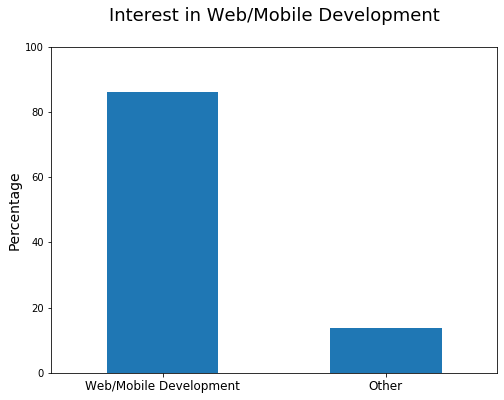

In [11]:
plt.figure(figsize=(8,6))
freq_table_web_mobile.plot.bar()
plt.style.use('ggplot')
plt.title('Interest in Web/Mobile Development', fontsize=18, y=1.06)
plt.xticks([0,1],['Web/Mobile Development', 'Other'], rotation=0, fontsize=12)
plt.ylabel('Percentage', fontsize=14)
plt.ylim([0, 100])
plt.show()